In [1]:
import torch
from cheetah import ParticleBeam

In [2]:
tensor_kwargs = dict(dtype=torch.float32)

In [3]:
n_runs = 10
dim = 6
n_samples = 10000

cov = torch.diag(torch.tensor((1,1,9,9,1,1), **tensor_kwargs))*1e-6
mean = torch.zeros(dim, **tensor_kwargs)
mvnorm = torch.distributions.MultivariateNormal(mean, covariance_matrix=cov)
coords = mvnorm.sample((n_runs, n_samples))
coords = torch.cat(
    (
        coords, 
        torch.ones(n_runs, n_samples, 1, **tensor_kwargs)
    ),
    dim=-1
)

coords.shape

torch.Size([10, 10000, 7])

In [4]:
beam_ensemble = ParticleBeam(
    particles = coords,
    energy = torch.tensor(40.0e6, **tensor_kwargs)
)
beam_ensemble.particles.shape

torch.Size([10, 10000, 7])

In [5]:
beam_ensemble.particles.shape

torch.Size([10, 10000, 7])

In [6]:
beam_ensemble.x.shape

torch.Size([10, 10000])

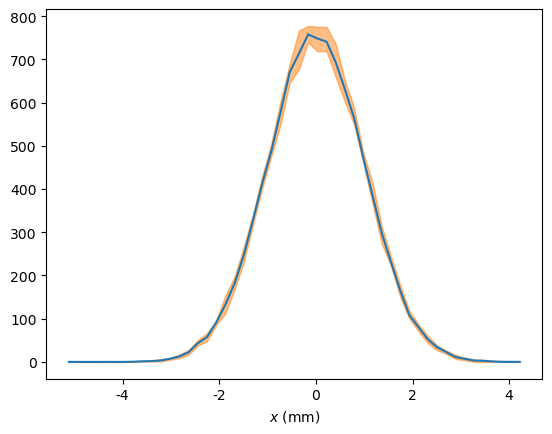

In [7]:
beam_ensemble.plot_1d_distribution(dimension='x', bins=50, uncertainty_type='percentile', confidence_level=0.8);

<Axes: xlabel='$x$ (mm)', ylabel='$y$ (mm)'>

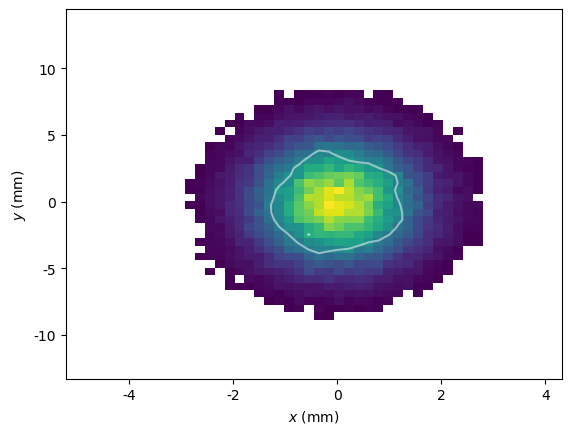

In [8]:
beam_ensemble.plot_2d_distribution(
    x_dimension='x', 
    y_dimension='y', 
    bins=50,
    confidence_contours=(2,)
)

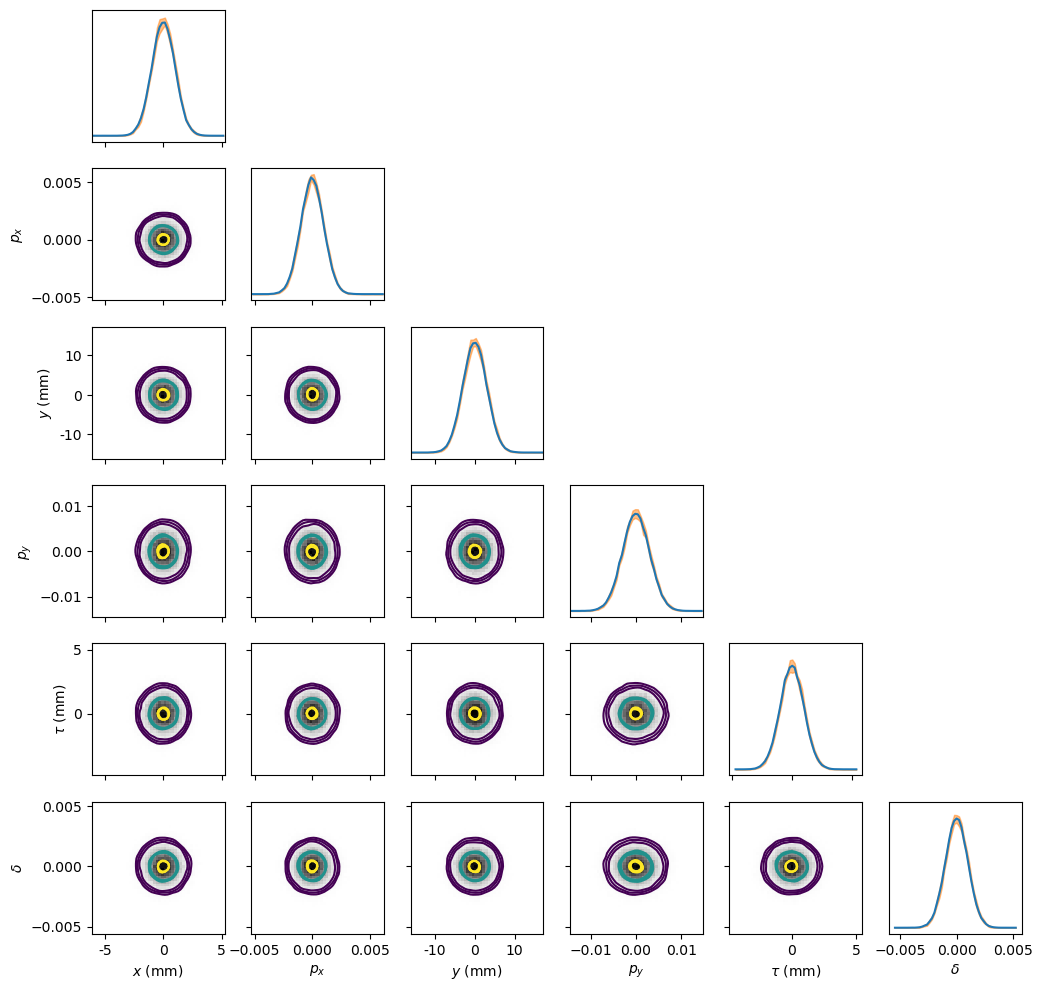

In [9]:
beam_ensemble.plot_distribution(
    bins=50,
    style='contour',
    uncertainty_type='percentile',
    confidence_level=0.95,
);

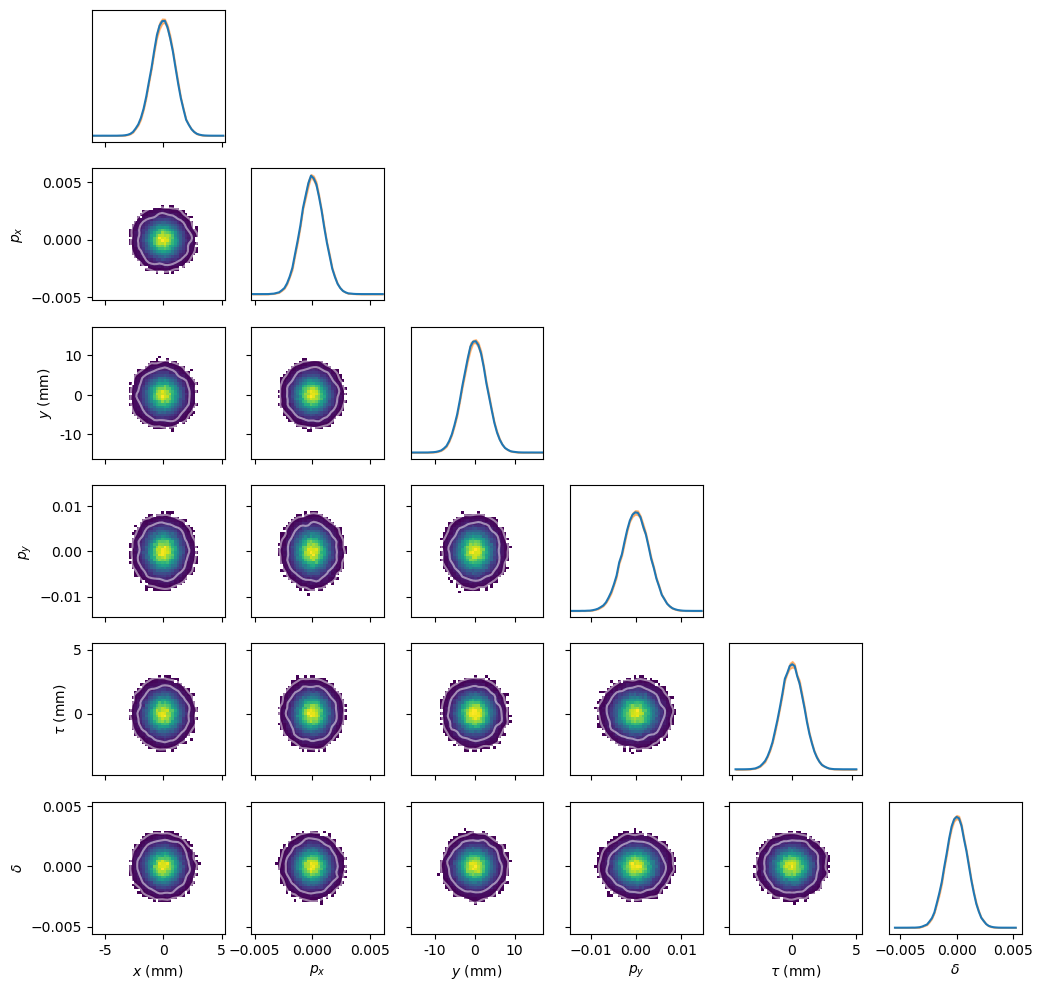

In [13]:
beam_ensemble.plot_distribution(
    bins=50,
    style='histogram',
    confidence_contours=(1,2),
    uncertainty_type='std_error',
    confidence_level=0.95,
);